# (09) Ablation -- neural

**Motivation**: Lesion bottom-up and top-down pathways, test how much performance drops. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# Code path
sys.path.insert(0, '/home/hadi/Documents/MTMST/code')
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Save bash scripts

In [2]:
args = [
    f'--lesion_enc {s}'
    for s in [2, 4, 8]
]
args += [
    f'--lesion_dec {s}'
    for s in [2, 4, 8]
]
args += [None]
args

['--lesion_enc 2',
 '--lesion_enc 4',
 '--lesion_enc 8',
 '--lesion_dec 2',
 '--lesion_dec 4',
 '--lesion_dec 8',
 None]

In [3]:
fits = [
    'fixate1_k-32_z-20x[3,6,12]_enc(1x3)-dec(1x2)-pre(1x3)-post(1x3)/ep160-b600-lr(0.002)_beta(0.15:0x0.5)_lamb(0.0001)_gr(250.0)_(2023_04_24,18:00)',
] * 7

save_script_neural(
    fits=fits,
    args=args,
    device='cuda',
)

[PROGRESS] 'run_neuron_gaban.txt' saved at
/home/hadi/Documents/MTMST/code/scripts

## Current

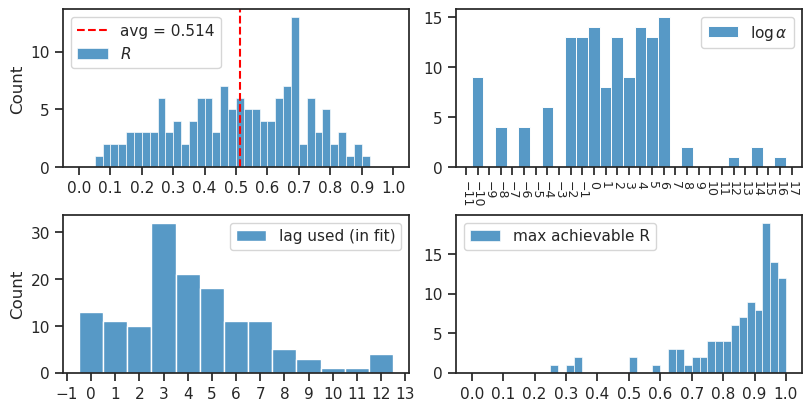

141

In [2]:
fit_name = 'fixate1_nf-420_beta-0.5_lesion-enc-2_(2023_08_08,08:07)'
df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)

_ = show_neural_results(df)
len(df)

In [3]:
inds = df['perf'].argsort()[::-1]
df.iloc[inds]

,category,nf,beta,lesion,lesion_scale,root,expt,cell,perf,max_perf,log_alpha,best_lag
118,fixate1,420,0.5,enc,2,ROOT,ytu028,8,1.119207,0.328052,-1.0,9
124,fixate1,420,0.5,enc,2,ROOT,ytu029,4,0.918387,0.935583,-4.0,5
69,fixate1,420,0.5,enc,2,ROOT,clu267,4,0.891229,0.979806,-1.0,4
42,fixate1,420,0.5,enc,2,ROOT,clu209,1,0.888157,0.923722,0.0,3
29,fixate1,420,0.5,enc,2,ROOT,clu120,0,0.858052,0.967720,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
38,fixate1,420,0.5,enc,2,ROOT,clu180,0,0.124579,NaN,5.0,12
96,fixate1,420,0.5,enc,2,ROOT,clu294,2,0.119755,NaN,4.0,7
97,fixate1,420,0.5,enc,2,ROOT,clu294,3,0.098077,NaN,6.0,1
13,fixate1,420,0.5,enc,2,ROOT,clu069,0,0.081697,NaN,5.0,4


In [4]:
expt = 'clu116'
ro = ro_all[f'ROOT_{expt}'].load_neurons()

In [5]:
cell = 0
y_tst = np.nanmean(ro.spks_r, 1)[cell]

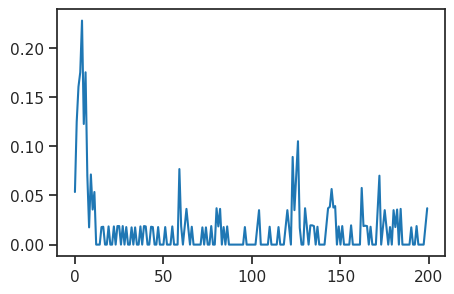

In [6]:
plt.plot(y_tst)

In [12]:
if hasattr(ro, 'xtract'):
    ro.kws_push = {
        k: v for k, v in
        ro.kws_push.items()
        if 'xtract' not in k
    }
else:
    ro.kws_xtract = ro.kws_push['kws_xtract']
    ro.kws_push = {
        k: v for k, v in
        ro.kws_push.items()
        if 'xtract' not in k
    }

In [13]:
data = ro.validate(cell)
list(data)

['x', 'y', 'x_tst', 'y_tst']

In [ ]:
pred_tst = ro.mod[cell].predict(data['x_tst'])

In [ ]:
plt.plot(data['y_tst'])
plt.plot(pred_tst)

In [ ]:
sp_stats.pearsonr(pred_tst, data['y_tst'])

In [ ]:
sk_metric.r2_score(y_true=data['y_tst'], y_pred=pred_tst)

In [45]:
ro.verbose = True

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (0, )

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-04 NaN   NaN  0.417322 -27.882612
1.000000e-03 NaN   NaN  0.421112 -28.324601
1.000000e-02 NaN   NaN  0.428563 -28.359785
1.000000e-01 NaN   NaN  0.432881 -27.262060
1.000000e+00 NaN   NaN  0.438985 -22.021505
1.000000e+01 NaN   NaN  0.446164 -13.411900
1.000000e+02 NaN   NaN  0.450583  -8.531271
1.000000e+03 NaN   NaN  0.449181  -6.886818
1.000000e+04 NaN   NaN  0.432293 -17.276228
1.000000e+05 NaN   NaN  0.410618 -33.967911
1.000000e+06 NaN   NaN  0.398245 -38.023978
1.000000e+07 NaN   NaN  0.376929  -4.252775
1.000000e+08 NaN   NaN  0.361780  12.126974
0.000000e+00 NaN   NaN  0.416489 -26.934597

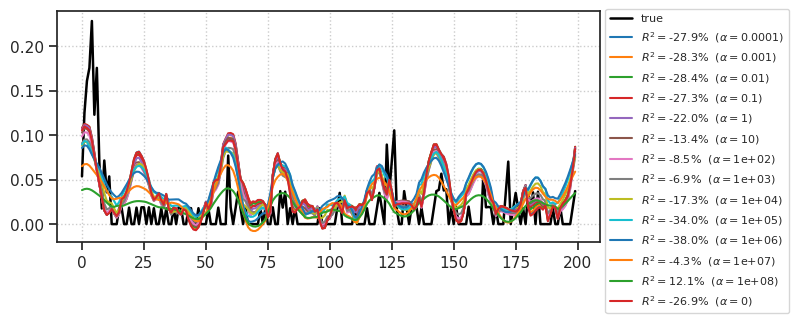

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (1, )

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-04 NaN   NaN  0.549276 -29.926471
1.000000e-03 NaN   NaN  0.550447 -31.638216
1.000000e-02 NaN   NaN  0.549213 -34.224869
1.000000e-01 NaN   NaN  0.546223 -34.755949
1.000000e+00 NaN   NaN  0.546602 -30.019688
1.000000e+01 NaN   NaN  0.545144 -21.339488
1.000000e+02 NaN   NaN  0.541216 -16.376319
1.000000e+03 NaN   NaN  0.525695 -13.958801
1.000000e+04 NaN   NaN  0.497876 -23.504773
1.000000e+05 NaN   NaN  0.476885 -38.907561
1.000000e+06 NaN   NaN  0.456681 -40.037831
1.000000e+07 NaN   NaN  0.422709  -2.914736
1.000000e+08 NaN   NaN  0.401669  15.239920
0.000000e+00 NaN   NaN  0.548907 -29.564777

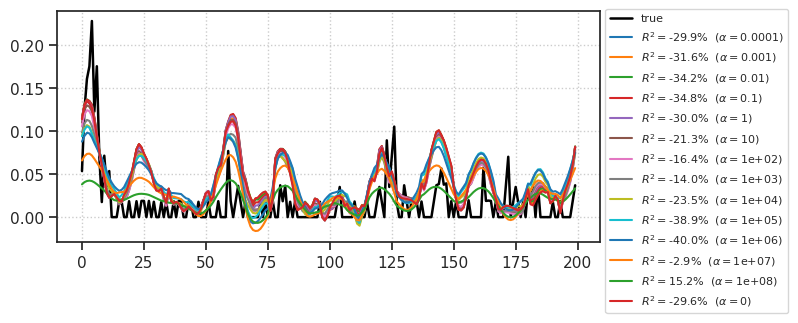

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (2, )

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-04 NaN   NaN  0.602436 -50.673421
1.000000e-03 NaN   NaN  0.602247 -53.603113
1.000000e-02 NaN   NaN  0.598698 -57.218785
1.000000e-01 NaN   NaN  0.595237 -58.260462
1.000000e+00 NaN   NaN  0.593156 -55.735138
1.000000e+01 NaN   NaN  0.587956 -47.615519
1.000000e+02 NaN   NaN  0.581050 -39.852920
1.000000e+03 NaN   NaN  0.562548 -30.079419
1.000000e+04 NaN   NaN  0.534756 -30.739252
1.000000e+05 NaN   NaN  0.508987 -44.325199
1.000000e+06 NaN   NaN  0.483353 -44.623700
1.000000e+07 NaN   NaN  0.443191  -4.476503
1.000000e+08 NaN   NaN  0.418900  16.759456
0.000000e+00 NaN   NaN  0.602561 -49.115950

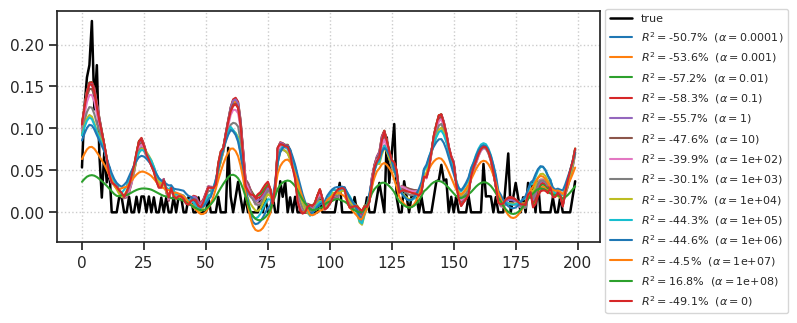

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (3, )

r  nnll     r_tst     r2_tst
alpha                                      
1.000000e-04 NaN   NaN  0.621362 -71.839346
1.000000e-03 NaN   NaN  0.621076 -74.921367
1.000000e-02 NaN   NaN  0.616285 -78.695151
1.000000e-01 NaN   NaN  0.611351 -79.038511
1.000000e+00 NaN   NaN  0.607627 -76.262569
1.000000e+01 NaN   NaN  0.601967 -68.061303
1.000000e+02 NaN   NaN  0.595361 -57.606145
1.000000e+03 NaN   NaN  0.578226 -44.782155
1.000000e+04 NaN   NaN  0.551610 -40.057065
1.000000e+05 NaN   NaN  0.523256 -51.384110
1.000000e+06 NaN   NaN  0.489968 -49.455677
1.000000e+07 NaN   NaN  0.445062  -7.205456
1.000000e+08 NaN   NaN  0.417185  16.689544
0.000000e+00 NaN   NaN  0.621888 -69.080350

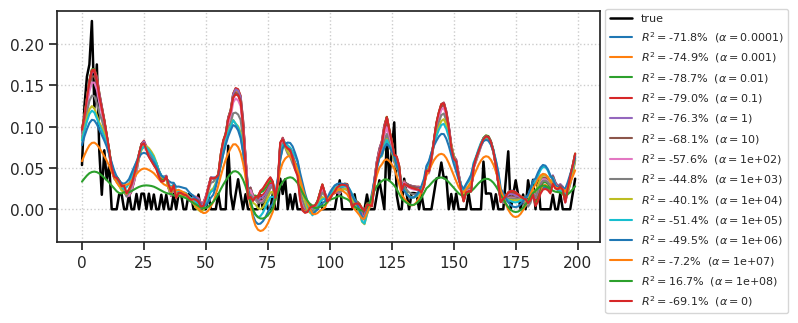

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (4, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN  0.569888  -93.771769
1.000000e-03 NaN   NaN  0.568629  -96.933343
1.000000e-02 NaN   NaN  0.561567 -100.667126
1.000000e-01 NaN   NaN  0.555008  -99.867460
1.000000e+00 NaN   NaN  0.550622  -95.050843
1.000000e+01 NaN   NaN  0.544503  -85.484391
1.000000e+02 NaN   NaN  0.540677  -72.722581
1.000000e+03 NaN   NaN  0.536622  -55.265183
1.000000e+04 NaN   NaN  0.524657  -44.594409
1.000000e+05 NaN   NaN  0.497529  -55.270615
1.000000e+06 NaN   NaN  0.463009  -55.106498
1.000000e+07 NaN   NaN  0.421123  -12.150066
1.000000e+08 NaN   NaN  0.393926   14.714858
0.000000e+00 NaN   NaN  0.571070  -91.917284

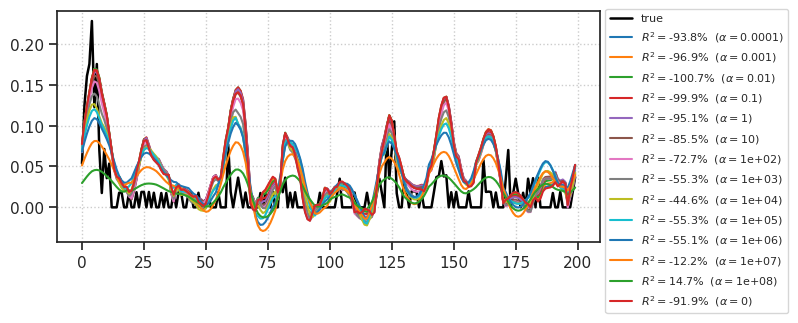

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (5, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN  0.467118 -123.805354
1.000000e-03 NaN   NaN  0.468231 -124.683358
1.000000e-02 NaN   NaN  0.463910 -126.033260
1.000000e-01 NaN   NaN  0.457774 -125.456950
1.000000e+00 NaN   NaN  0.454751 -122.723694
1.000000e+01 NaN   NaN  0.451253 -115.253362
1.000000e+02 NaN   NaN  0.450492 -101.344016
1.000000e+03 NaN   NaN  0.455082  -79.325620
1.000000e+04 NaN   NaN  0.456631  -59.524797
1.000000e+05 NaN   NaN  0.438515  -67.921060
1.000000e+06 NaN   NaN  0.409495  -66.137009
1.000000e+07 NaN   NaN  0.376298  -19.679038
1.000000e+08 NaN   NaN  0.352314   11.178726
0.000000e+00 NaN   NaN  0.470039 -124.175431

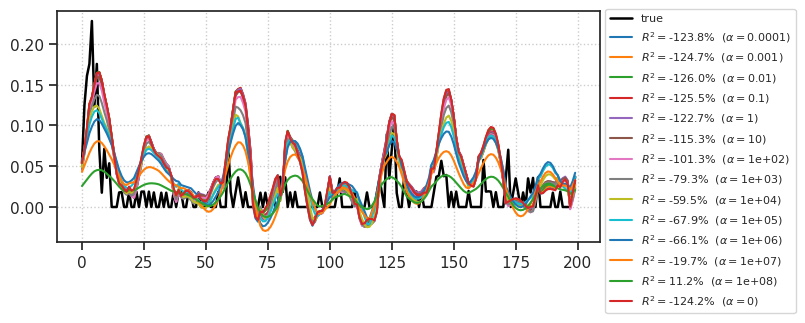

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (6, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN  0.360474 -147.246867
1.000000e-03 NaN   NaN  0.359969 -148.035621
1.000000e-02 NaN   NaN  0.353993 -147.704249
1.000000e-01 NaN   NaN  0.346887 -144.442113
1.000000e+00 NaN   NaN  0.342365 -140.052639
1.000000e+01 NaN   NaN  0.337661 -131.654194
1.000000e+02 NaN   NaN  0.340615 -116.871771
1.000000e+03 NaN   NaN  0.359083  -93.960508
1.000000e+04 NaN   NaN  0.375368  -70.540283
1.000000e+05 NaN   NaN  0.364977  -75.921549
1.000000e+06 NaN   NaN  0.343890  -73.654583
1.000000e+07 NaN   NaN  0.318090  -26.463696
1.000000e+08 NaN   NaN  0.294686    6.664267
0.000000e+00 NaN   NaN  0.362313 -147.399108

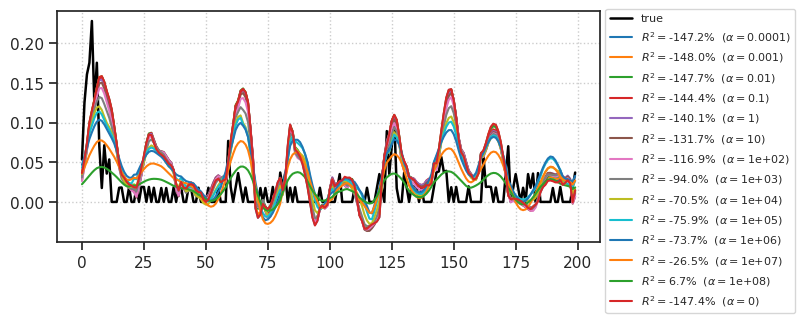

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (7, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN  0.238769 -164.907737
1.000000e-03 NaN   NaN  0.237524 -164.971658
1.000000e-02 NaN   NaN  0.230718 -163.192875
1.000000e-01 NaN   NaN  0.224425 -158.155015
1.000000e+00 NaN   NaN  0.219783 -152.849388
1.000000e+01 NaN   NaN  0.214743 -145.635418
1.000000e+02 NaN   NaN  0.217854 -133.911693
1.000000e+03 NaN   NaN  0.240632 -112.676876
1.000000e+04 NaN   NaN  0.267121  -88.219939
1.000000e+05 NaN   NaN  0.268624  -89.916170
1.000000e+06 NaN   NaN  0.260634  -82.824939
1.000000e+07 NaN   NaN  0.247361  -33.151458
1.000000e+08 NaN   NaN  0.228313    2.105363
0.000000e+00 NaN   NaN  0.242120 -166.545039

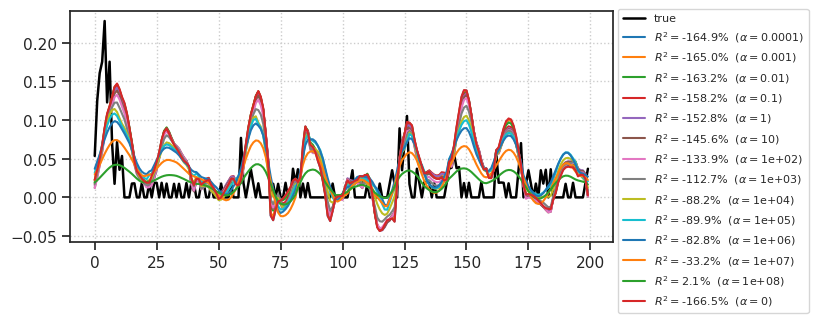

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (8, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN  0.163085 -146.189035
1.000000e-03 NaN   NaN  0.161410 -146.745780
1.000000e-02 NaN   NaN  0.155292 -145.461898
1.000000e-01 NaN   NaN  0.149264 -140.989119
1.000000e+00 NaN   NaN  0.145080 -136.921199
1.000000e+01 NaN   NaN  0.140977 -131.386225
1.000000e+02 NaN   NaN  0.143491 -121.322208
1.000000e+03 NaN   NaN  0.158206 -105.947305
1.000000e+04 NaN   NaN  0.173588  -89.996498
1.000000e+05 NaN   NaN  0.179492  -90.232064
1.000000e+06 NaN   NaN  0.180218  -82.287520
1.000000e+07 NaN   NaN  0.177695  -35.087216
1.000000e+08 NaN   NaN  0.163896   -1.220172
0.000000e+00 NaN   NaN  0.163755 -148.910587

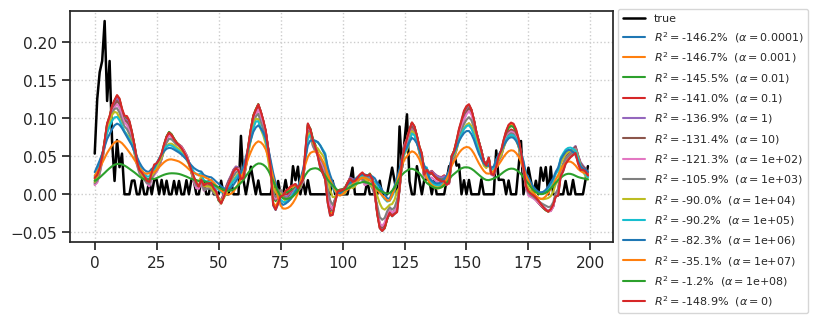

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (9, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN  0.071669 -138.558351
1.000000e-03 NaN   NaN  0.071492 -137.987069
1.000000e-02 NaN   NaN  0.069389 -135.557487
1.000000e-01 NaN   NaN  0.067910 -131.478609
1.000000e+00 NaN   NaN  0.067966 -130.430009
1.000000e+01 NaN   NaN  0.067556 -128.144718
1.000000e+02 NaN   NaN  0.068459 -120.139690
1.000000e+03 NaN   NaN  0.078916 -107.585302
1.000000e+04 NaN   NaN  0.089911  -95.006023
1.000000e+05 NaN   NaN  0.095439  -93.302840
1.000000e+06 NaN   NaN  0.096486  -82.874388
1.000000e+07 NaN   NaN  0.102353  -36.450004
1.000000e+08 NaN   NaN  0.096354   -3.846507
0.000000e+00 NaN   NaN  0.070588 -140.567120

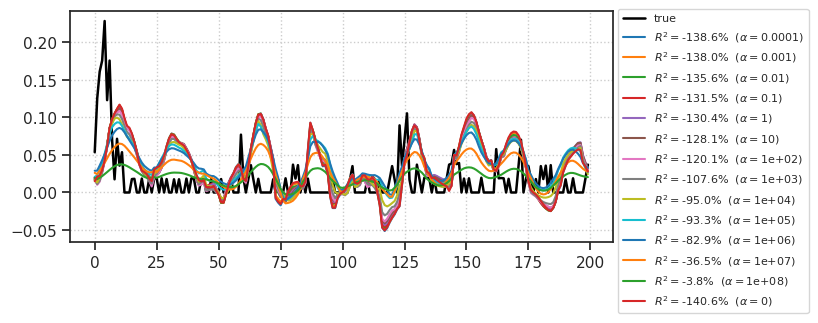

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (10, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN -0.012667 -135.458777
1.000000e-03 NaN   NaN -0.013725 -134.780099
1.000000e-02 NaN   NaN -0.016823 -132.009000
1.000000e-01 NaN   NaN -0.018783 -128.216892
1.000000e+00 NaN   NaN -0.018347 -127.147727
1.000000e+01 NaN   NaN -0.018381 -124.988390
1.000000e+02 NaN   NaN -0.017626 -118.368558
1.000000e+03 NaN   NaN -0.009366 -111.533681
1.000000e+04 NaN   NaN -0.000870 -103.159129
1.000000e+05 NaN   NaN  0.007341  -96.052316
1.000000e+06 NaN   NaN  0.016791  -81.011489
1.000000e+07 NaN   NaN  0.031154  -35.723457
1.000000e+08 NaN   NaN  0.033278   -5.267033
0.000000e+00 NaN   NaN -0.012979 -137.475450

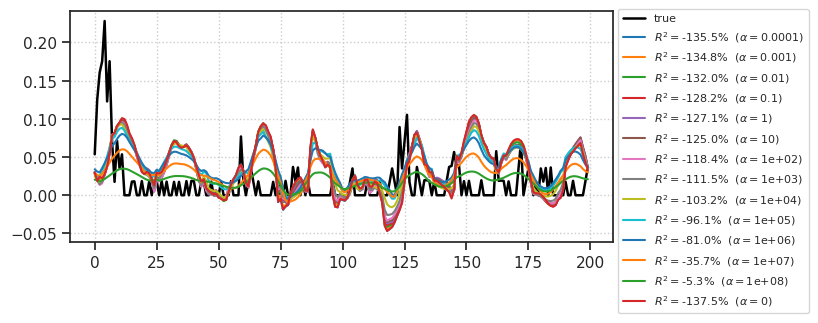

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

--------------------------------------------------------------------------------
clu116, neuron # 0; inds: (lag, [i, j]) = (11, )

r  nnll     r_tst      r2_tst
alpha                                       
1.000000e-04 NaN   NaN -0.071590 -106.679075
1.000000e-03 NaN   NaN -0.072086 -106.578184
1.000000e-02 NaN   NaN -0.074856 -106.177053
1.000000e-01 NaN   NaN -0.075718 -105.244936
1.000000e+00 NaN   NaN -0.073602 -105.703350
1.000000e+01 NaN   NaN -0.073431 -104.866931
1.000000e+02 NaN   NaN -0.073723 -100.629963
1.000000e+03 NaN   NaN -0.072258  -99.124754
1.000000e+04 NaN   NaN -0.070962  -97.003624
1.000000e+05 NaN   NaN -0.058687  -91.288841
1.000000e+06 NaN   NaN -0.042936  -74.548006
1.000000e+07 NaN   NaN -0.025371  -32.165936
1.000000e+08 NaN   NaN -0.019930   -5.454773
0.000000e+00 NaN   NaN -0.073113 -106.863267

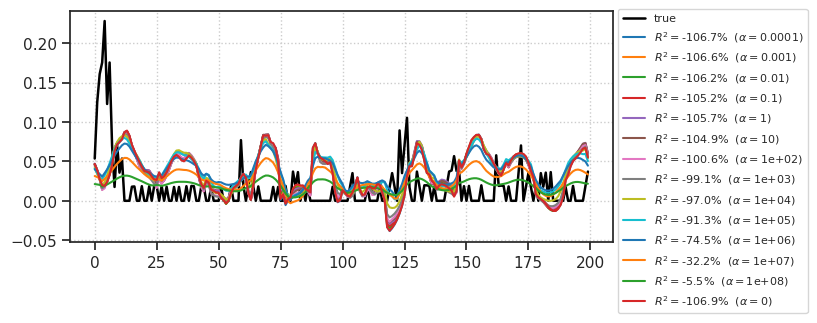

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clu116, neuron # 0;  best alpha = 0, best_r = 0.622

In [46]:
a = ro.fit_neuron(cell, lags=range(12))

In [47]:
ro.has_repeats

True

In [48]:
perm = sk_inspect.permutation_importance(
    estimator=ro.mod[cell],
    X=data['x_tst' if ro.has_repeats else 'x'],
    y=data['y_tst' if ro.has_repeats else 'y'],
    random_state=0,
    n_repeats=10,
)
perm_mu = np.maximum(0, perm['importances_mean'])

p_z_given_neuron = perm_mu / perm_mu.sum()
a = 1 - entropy_normalized(p_z_given_neuron, axis=0)
a

0.30168704061235696

In [49]:
perm_ = sk_inspect.permutation_importance(
    estimator=ro.mod[cell],
    X=data['x'],
    y=data['y'],
    random_state=0,
    n_repeats=10,
)
perm_mu_ = np.maximum(0, perm_['importances_mean'])

new_version = perm_mu_ / perm_mu_.sum()
a2 = 1 - entropy_normalized(new_version)
a2

0.43044537891571666

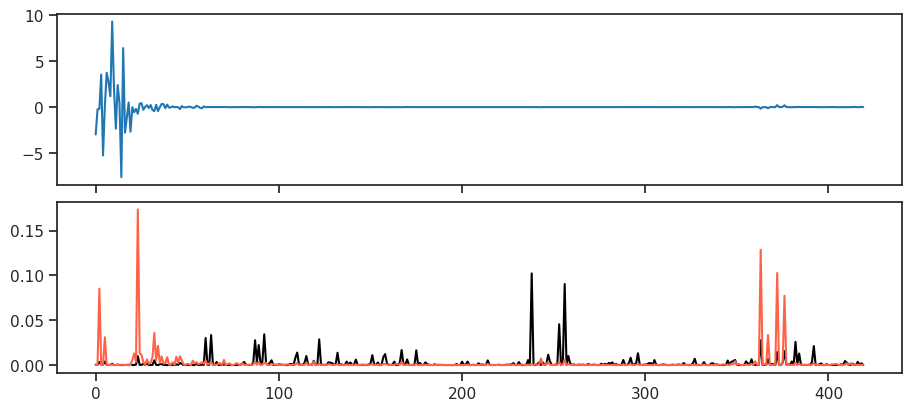

In [50]:
fig, axes = create_figure(2, 1, (9, 4), sharex='all', layout='constrained')
axes[0].plot(ro.mod[cell].coef_)
axes[1].plot(p_z_given_neuron, color='k')
axes[1].plot(new_version, color='tomato')

In [51]:
mu, sd = data['x'].mean(0, keepdims=True), data['x'].std(0, keepdims=True)

In [52]:
lasso = sk_linear.Lasso(alpha=0.01).fit(
    normalize_global(data['x'], mu, sd), data['y'])
pred_tst = lasso.predict(normalize_global(data['x_tst'], mu, sd))

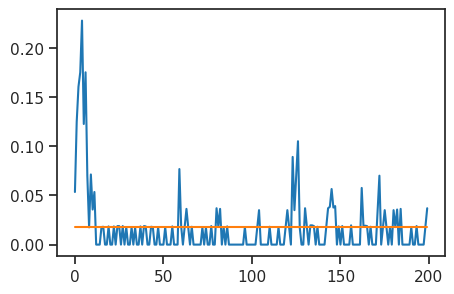

In [53]:
plt.plot(data['y_tst'])
plt.plot(pred_tst)

In [54]:
sk_metric.r2_score(y_true=data['y_tst'], y_pred=pred_tst)

-9.760121096569208e-05

In [55]:
w = np.abs(lasso.coef_)
w /= w.sum()

/tmp/ipykernel_212458/854826648.py:2: RuntimeWarning: invalid value encountered in true_divide
  w /= w.sum()


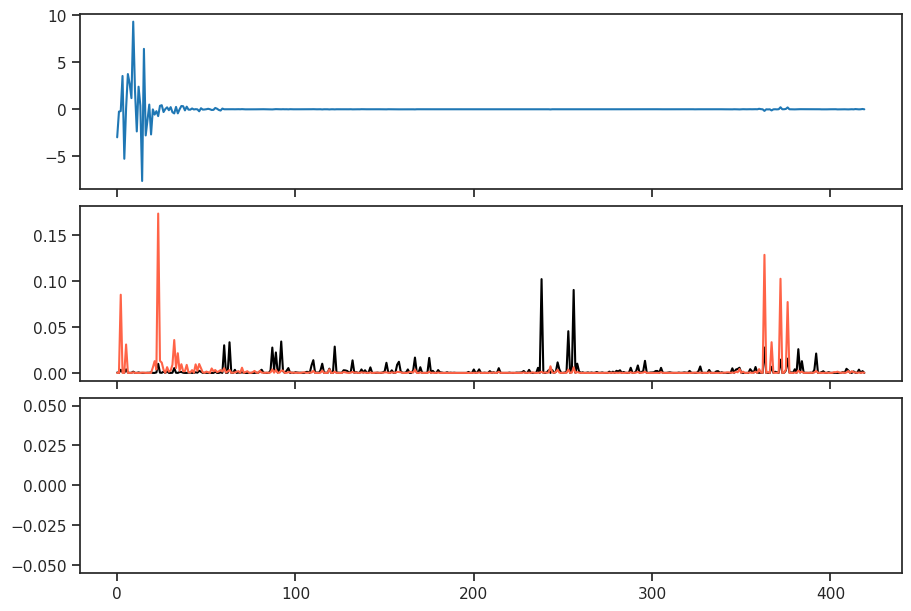

In [56]:
fig, axes = create_figure(3, 1, (9, 6), sharex='all', layout='constrained')
axes[0].plot(ro.mod[cell].coef_)
axes[1].plot(p_z_given_neuron, color='k')
axes[1].plot(new_version, color='tomato')
axes[2].plot(w, color='magenta')

In [57]:
1 - entropy_normalized(w)

nan

In [58]:
nonzero = w > 1e-2
nonzero.sum()

0

In [59]:
mu, sd = data['x'].mean(0, keepdims=True), data['x'].std(0, keepdims=True)

In [60]:
lr = sk_linear.LinearRegression().fit(
    normalize_global(data['x'], mu, sd)[:, nonzero], data['y'])
pred_tst = lr.predict(normalize_global(data['x_tst'], mu, sd)[:, nonzero])

ValueError: Found array with 0 feature(s) (shape=(55536, 0)) while a minimum of 1 is required by LinearRegression.

In [ ]:
plt.plot(data['y_tst'])
plt.plot(pred_tst)

In [28]:
sk_metric.r2_score(y_true=data['y_tst'], y_pred=pred_tst)

0.5057265083844164

In [29]:
w = np.zeros(420)
w[nonzero] = np.abs(lr.coef_)
w /= w.sum()

In [30]:
1 - entropy_normalized(w)

0.6182599560587859

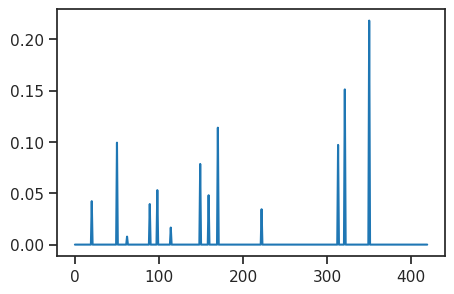

In [31]:
plt.plot(w)

## Lesion results

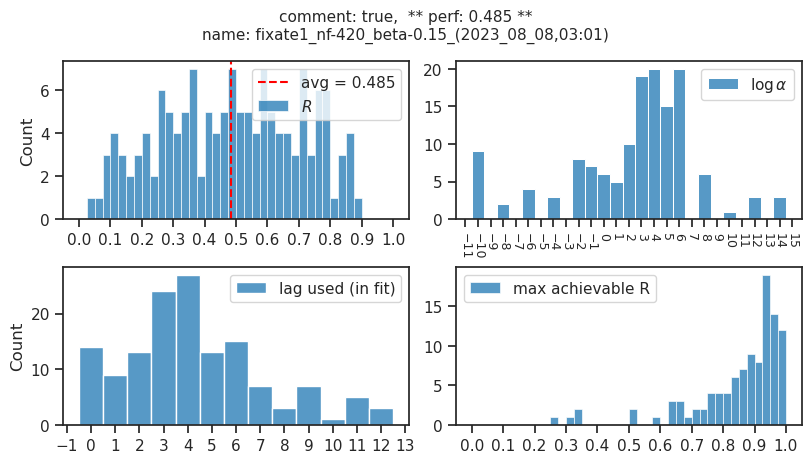

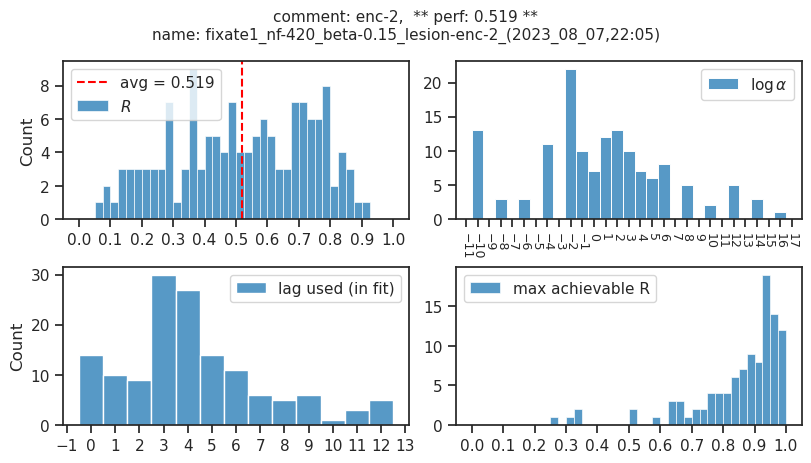

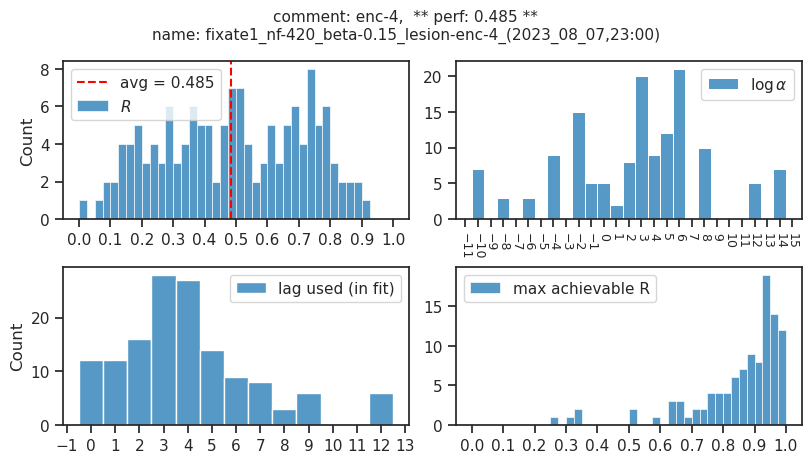

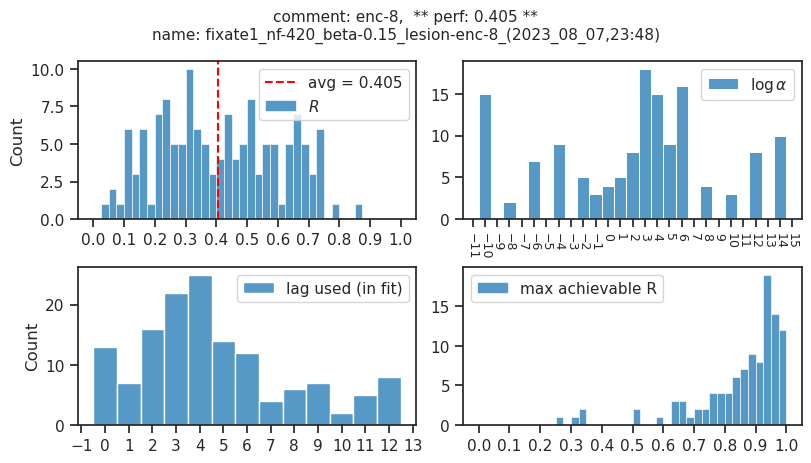

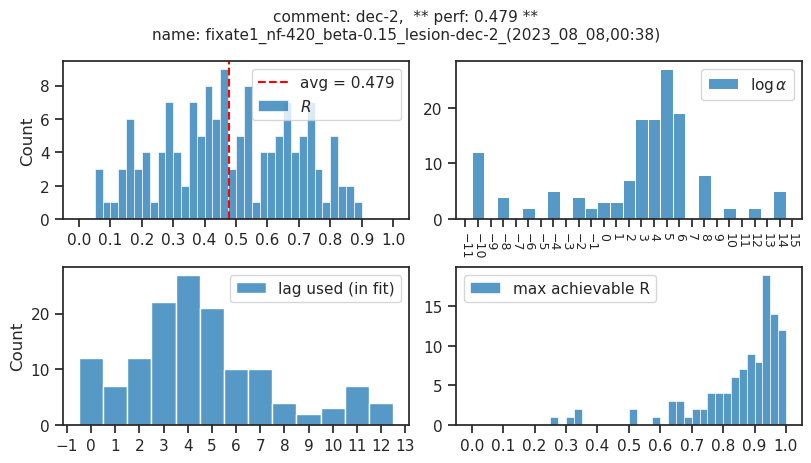

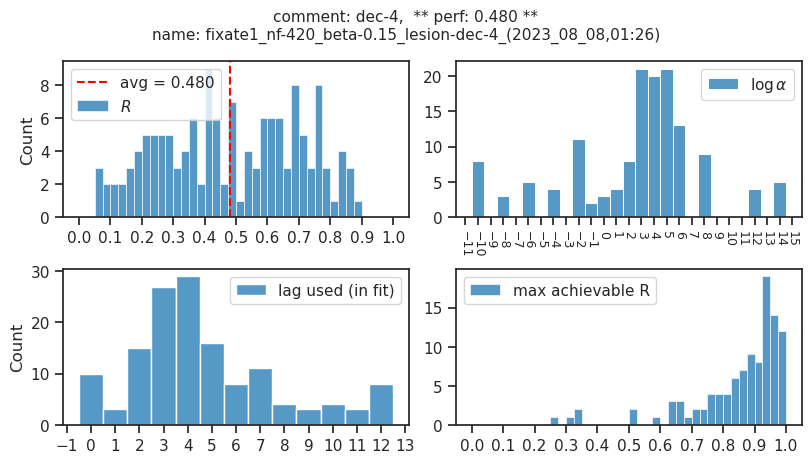

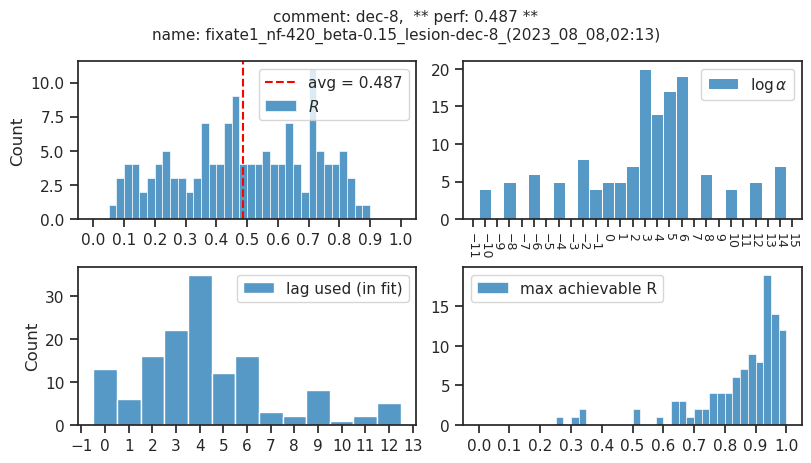

In [2]:
fits = {
    'true': 'fixate1_nf-420_beta-0.15_(2023_08_08,03:01)',
    'enc-2': 'fixate1_nf-420_beta-0.15_lesion-enc-2_(2023_08_07,22:05)',
    'enc-4': 'fixate1_nf-420_beta-0.15_lesion-enc-4_(2023_08_07,23:00)',
    'enc-8': 'fixate1_nf-420_beta-0.15_lesion-enc-8_(2023_08_07,23:48)',
    'dec-2': 'fixate1_nf-420_beta-0.15_lesion-dec-2_(2023_08_08,00:38)',
    'dec-4': 'fixate1_nf-420_beta-0.15_lesion-dec-4_(2023_08_08,01:26)',
    'dec-8': 'fixate1_nf-420_beta-0.15_lesion-dec-8_(2023_08_08,02:13)',
}
for k, fit_name in fits.items():
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(f"comment: {k},  ** perf: {df['perf'].mean():0.3f} **\nname: {fit_name}", y=1.12, fontsize=11)
    display(fig)

## Fit perm scores

Code adapted from ```09_neural-analysis-KABA``` notebook.

In [3]:
path = results_dir()
path = pathlib.Path(path)

trainer_paths = set()
pat = '**/*fixate1*/**/Trainer'
for p in path.rglob(pat):
    if p.is_dir():
        trainer_paths.add(str(p))
trainer_paths = sorted(trainer_paths)
len(trainer_paths)

59

In [4]:
selected_fits = [
    s for s in trainer_paths if
    int(s.split('(')[1].split(')')[0].split('_')[1]) == 8
]
selected_fits

['/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_(2023_08_08,03:01)/Trainer',
 '/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_lesion-dec-2_(2023_08_08,00:38)/Trainer',
 '/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_lesion-dec-4_(2023_08_08,01:26)/Trainer',
 '/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_lesion-dec-8_(2023_08_08,02:13)/Trainer',
 '/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_lesion-enc-2_(2023_08_07,22:05)/Trainer',
 '/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_lesion-enc-4_(2023_08_07,23:00)/Trainer',
 '/home/hadi/Documents/MTMST/results/Ridge/fixate1_nf-420_beta-0.15_lesion-enc-8_(2023_08_07,23:48)/Trainer']

In [ ]:
pbar = tqdm(selected_fits)
for fit_path in pbar:
    fit_name = fit_path.split('/')[-2]
    f = pjoin(tmp_dir, 'neural_analysis', f"{fit_name}.npy")
    if os.path.isfile(f):
        continue
    pbar.set_description(fit_name)

    df, df_all, ro_all, args, tr = summarize_neural_fits(
        fit_name=fit_name, device='cuda')

    # extract neural results
    neural_results = collections.defaultdict(dict)
    for key, ro in ro_all.items():
        for cell, m in ro.mod.items():
            data = ro.validate(cell)
            pred = m.predict(data['x'])
            if ro.has_repeats:
                pred_tst = m.predict(data['x_tst'])
            else:
                pred_tst = None

            # perm importance
            perm = sk_inspect.permutation_importance(
                estimator=m,
                X=data['x_tst' if ro.has_repeats else 'x'],
                y=data['y_tst' if ro.has_repeats else 'y'],
                random_state=0,
                n_repeats=10,
            )
            perm_mu = np.maximum(0, perm['importances_mean'])
            perm_sd = perm['importances_std']

            # Probs
            p_z_given_neuron = perm_mu / perm_mu.sum()
            a = 1 - entropy_normalized(p_z_given_neuron, axis=0)
            
            k = f"{key}_{cell}"
            neural_results['data'][k] = data
            neural_results['pred'][k] = pred
            neural_results['pred_tst'][k] = pred_tst
            neural_results['perm_mu'][k] = perm_mu
            neural_results['perm_sd'][k] = perm_sd
            neural_results['alignment_score'][k] = a

    # save
    save_obj(
        obj=neural_results,
        file_name=fit_name,
        save_dir=pjoin(tmp_dir, 'neural_analysis'),
        verbose=True,
        mode='npy',
    )
    torch.cuda.empty_cache()

fixate1_nf-420_beta-0.15_(2023_08_08,03:01):   0%|        | 0/7 [00:00<?, ?it/s]/home/hadi/Documents/MTMST/code/analysis/helper.py:130: RuntimeWarning: invalid value encountered in true_divide
  return signal_power / response_power


[PROGRESS] 'fixate1_nf-420_beta-0.15_(2023_08_08,03:01).npy' saved at
/home/hadi/Dropbox/git/jb-MTMST/tmp/neural_analysis

fixate1_nf-420_beta-0.15_lesion-dec-2_(2023_08_08,00:38):  14%|▏| 1/7 [42:06<4:1/home/hadi/Documents/MTMST/code/analysis/helper.py:130: RuntimeWarning: invalid value encountered in true_divide
  return signal_power / response_power


[PROGRESS] 'fixate1_nf-420_beta-0.15_lesion-dec-2_(2023_08_08,00:38).npy' saved at
/home/hadi/Dropbox/git/jb-MTMST/tmp/neural_analysis

fixate1_nf-420_beta-0.15_lesion-dec-4_(2023_08_08,01:26):  29%|▎| 2/7 [1:28:05<3/home/hadi/Documents/MTMST/code/analysis/helper.py:130: RuntimeWarning: invalid value encountered in true_divide
  return signal_power / response_power


[PROGRESS] 'fixate1_nf-420_beta-0.15_lesion-dec-4_(2023_08_08,01:26).npy' saved at
/home/hadi/Dropbox/git/jb-MTMST/tmp/neural_analysis

fixate1_nf-420_beta-0.15_lesion-dec-8_(2023_08_08,02:13):  43%|▍| 3/7 [2:17:02<3/home/hadi/Documents/MTMST/code/analysis/helper.py:130: RuntimeWarning: invalid value encountered in true_divide
  return signal_power / response_power


[PROGRESS] 'fixate1_nf-420_beta-0.15_lesion-dec-8_(2023_08_08,02:13).npy' saved at
/home/hadi/Dropbox/git/jb-MTMST/tmp/neural_analysis

fixate1_nf-420_beta-0.15_lesion-enc-2_(2023_08_07,22:05):  57%|▌| 4/7 [2:54:38<2

## Delete

In [2]:
args = [
    f'--lesion_enc {s} --dry_run'
    for s in [2, 4, 8]
]
args += [
    f'--lesion_dec {s} --dry_run'
    for s in [2, 4, 8]
]
args += ['--dry_run']
args

['--lesion_enc 2 --dry_run',
 '--lesion_enc 4 --dry_run',
 '--lesion_enc 8 --dry_run',
 '--lesion_dec 2 --dry_run',
 '--lesion_dec 4 --dry_run',
 '--lesion_dec 8 --dry_run',
 '--dry_run']

In [3]:
fits = [
    'fixate1_k-32_z-20x[3,6,12]_enc(1x3)-dec(1x2)-pre(1x3)-post(1x3)/ep160-b600-lr(0.002)_beta(0.15:0x0.5)_lamb(0.0001)_gr(250.0)_(2023_04_24,18:00)',
] * 7

save_script_neural(
    fits=fits,
    args=args,
    device='cuda',
)

[PROGRESS] 'run_neuron_gaban.txt' saved at
/home/hadi/Documents/MTMST/code/scripts